      Unnamed: 0     algo dataname  ncol  nrow  qubitdist  shadowsize  \
4              4    celer      new     5     4          2         250   
5              5    celer      new     5     5          2         250   
7              7    celer      new     5     7          2         250   
9              9    celer      new     5     8          2         250   
10            10    celer      new     5     9          2         250   
...          ...      ...      ...   ...   ...        ...         ...   
5393        5393  sklearn      new     5     5          2          50   
5395        5395  sklearn      new     5     7          2          50   
5397        5397  sklearn      new     5     8          2          50   
5398        5398  sklearn      new     5     9          2          50   
5399        5399  sklearn      new     5     6          2          50   

      testsize     tol  nsamples  avg_train  avg_test  nsamples_new  
4          0.5  0.0001     250.0   0.118445  0.056468

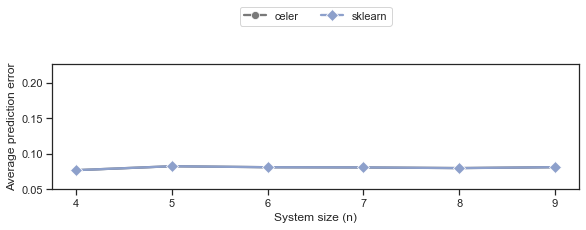

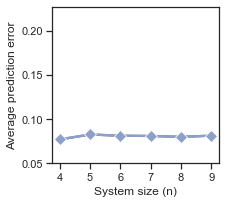

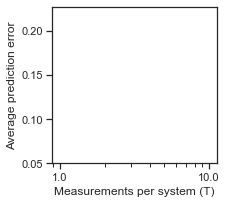

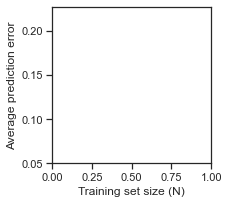

In [33]:
# This file contains functions to plot results.

import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import ast
import numpy as np
import os
import pandas as pd
import seaborn as sns

if __name__ == '__main__':
    # for plotting local region:
    # length = 4
    # width = 5
    # test_size = 0.5
    # shadow_size = 1000
    # data_name = 'new'
    # d = 1
    # plot_local_region(length, width, test_size, shadow_size, data_name, d)


    # for plotting prediction error:
    sns.set(style="ticks")
    df = pd.read_excel('./../clean_results/results_all.xlsx')

    # only using data where we have both previous method and new method data
    # df = df.dropna()
    
    df = df.drop(columns=["path", "edges", "best_cv_score", "test_score", "train_mat", "test_mat", "maxep", "maxiter", "nedges"])

    # for combined 3x3 plots
    # fig, axs = plt.subplots(3, 3, sharey=True, sharex='col', figsize=(15,8))
    
    # for i in range(3):
    #     for j in range(3):
    #         xaxis = ['System Size', 'Training Size', 'Shadow Size']
    #         legend = False
    #         if j == 2 and i == 2:
    #             legend = True
    #         sns.lineplot(
    #             data=df[df['Distance'] == i + 1],
    #             x=xaxis[j],
    #             y='Avg Prediction Error',
    #             style='Training Size',
    #             hue='Algorithm',
    #             marker='o',
    #             ci=None,
    #             ax=axs[i][j],
    #             legend=legend
    #         )
    # axs[0][2].set_title('Distance 1', x=1.2, y=0.4)
    # axs[1][2].set_title('Distance 2', x=1.2, y=0.4)
    # axs[2][2].set_title('Distance 3', x=1.2, y=0.4)

    # axs[0][2].set_xscale('log')
    # axs[0][2].set_xticks([50, 100, 250, 500, 1000])
    # axs[0][2].set_xticklabels([50, 100, 250, 500, 1000])

    # axs[2][2].legend(bbox_to_anchor=(1, 3.5), loc='upper left', ncol=1)

    # for single plots

    # rounding
    df['nsamples_new'] = (df['nsamples'] // 20) * 20 + 10
    df['nsamples_new'] = df['nsamples_new'].astype(int)
    print(df[df['dataname'] == "new"])
    
    fig=plt.figure(figsize=(8.3, 4.0))
    
    print(df[(df['dataname'] == "new") & (df['qubitdist'] == 1) & (df['nsamples_new'] == 150) & (df['shadowsize'] == 500)])
    
    sns.lineplot(
        data=df[(df['dataname'] == "new") & (df['qubitdist'] == 1) & (df['nsamples_new'] == 150) & (df['shadowsize'] == 500)],
        x='nrow',
        y='avg_test',
        hue='algo',
        style='algo',
        dashes=False,
        #markers=['o', 'D', 'X', 's'],
        markers=['o', 'D'],
        markersize=8.1,
        linewidth = 2.3,
        #palette=[sns.color_palette("muted")[7], sns.color_palette("colorblind")[7], sns.color_palette("bright")[7], sns.color_palette("Set2")[2]]
        palette=[sns.color_palette("muted")[7], sns.color_palette("Set2")[2]]
    )
    
    plt.xlabel('System size (n)')
    plt.ylabel('Average prediction error')
    plt.xticks([4, 5, 6, 7, 8, 9])
    plt.ylim(0.05, 0.227)
    plt.legend([],[], frameon=False)
    #plt.legend(title='', labels=['Previous work (Dirichlet kernel)', 'Gaussian kernel', r'Infinite-width NN', 'This work'], ncol=4, bbox_to_anchor=(0.5, 1.5), loc='upper center')
    plt.legend(title='', labels=['celer', 'sklearn'], ncol=4, bbox_to_anchor=(0.5, 1.5), loc='upper center')
    plt.tight_layout()
    plt.savefig('system-size-for-legend.png', dpi=300)

    fig=plt.figure(figsize=(3.3, 3.0))
    
    sns.lineplot(
        data=df[(df['dataname'] == "new") & (df['qubitdist'] == 1) & (df['nsamples_new'] == 150) & (df['shadowsize'] == 500)],
        x='nrow',
        y='avg_test',
        hue='algo',
        style='algo',
        dashes=False,
        markers=['o', 'D'],
        markersize=8.1,
        linewidth = 2.3,
        palette=[sns.color_palette("muted")[7], sns.color_palette("Set2")[2]]
    )
    
    plt.xlabel('System size (n)')
    plt.ylabel('Average prediction error')
    plt.xticks([4, 5, 6, 7, 8, 9])
    plt.ylim(0.05, 0.227)
    plt.legend([],[], frameon=False)
    plt.tight_layout()
    plt.savefig('system-size.png', dpi=300)
    
    fig=plt.figure(figsize=(3.3, 3.0))
    ax = sns.lineplot(
        data=df[(df['dataname'] == "new") & (df['nrow'] == '9') & (df['qubitdist'] == 1) & (df['nsamples_new'] == 150)],
        x='shadowsize',
        y='avg_test',
        hue='algo',
        style='algo',
        markers=['o', 'D'],
        dashes=False,
        markersize=8.1,
        linewidth = 2.2,
        palette=[sns.color_palette("muted")[7], sns.color_palette("Set2")[2]]
    )
    plt.xlabel(r'Measurements per system (T)')
    plt.ylabel('Average prediction error')
    plt.xscale('log')
    plt.ylim(0.05, 0.227)
    #ax.set_xticks([60, 125, 250, 500, 1000])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.legend([],[], frameon=False)
#     plt.legend(title='', labels=['Previous work', 'Gaussian', r'$\infty$-width NN', 'This work'])
    plt.tight_layout()
    plt.savefig('shadow-size.png', dpi=300)
    
    fig=plt.figure(figsize=(3.3, 3.0))
    sns.lineplot(
        data=df[(df['dataname'] == "orig") & (df['nrow'] == '9') & (df['qubitdist'] == 1) & (df['shadowsize'] == 500)],
        x='nsamples_new',
        y='avg_test',
        hue='algo',
        style='algo',
        markers=['o', 'D'],
        dashes=False,
        markersize=8.5,
        linewidth = 2.2,
        palette=[sns.color_palette("muted")[7], sns.color_palette("Set2")[2]]
    )
    plt.xlabel('Training set size (N)')
    plt.ylabel('Average prediction error')
    plt.ylim(0.05, 0.227)
    plt.legend([],[], frameon=False)
#     plt.legend(title='', labels=['Previous work', 'Gaussian', r'$\infty$-width NN', 'This work'])
    plt.tight_layout()
    plt.savefig('training-size.png', dpi=300)


In [6]:

def plot_local_region(length, width, test_size, shadow_size, data_name, d):
    # used to plot coefficients of Lasso for new algorithm on 2D grid to visualize local region found by algorithm

    q1 = 0
    q2 = 0

    # linear regression file
    #f = open('./../clean_results/test_size=0.5_shadow_size=1000_orig_data_qubits_d=2_linear_regression/coefficients_4x5.txt', 'r')

    # all other files
    f = open('./../clean_results/new_algorithm/test_size={}_shadow_size={}_qubits_d={}/coefficients_{}x{}_{}_data.txt'.format(test_size, shadow_size, d, length, width, data_name), 'r')
    for line in f:
        if line[0:1] == '(':
            q1, q2 = ast.literal_eval(line[11:-1])
        else:
            edge_and_coef = ast.literal_eval(line)
            coef = np.array(list(map(lambda x : x[1], edge_and_coef)))

            fig=plt.figure(figsize=(3.4*1.01, 3.0*1.01))
            
            G = nx.grid_2d_graph(length, width)

            pos = {(x, y) : (y, -x) for x, y in G.nodes()}
            node_to_int = {}
            for i in range(len(G.nodes())):
                (x, y) = list(G.nodes())[i]
                node_to_int[(x, y)] = i + 1

            edge_cmap = sns.color_palette("light:b", as_cmap=True)
            line_width = coef * 50 + 5
            edge_color = coef * 100
            vmin = min(edge_color)
            vmax = max(edge_color)

            # this is same order as all_edges in algorithm
            edges = list(map(lambda e : (node_to_int[e[0]], node_to_int[e[1]]), list(G.edges())))

            nx.draw_networkx_nodes(
                G,
                pos,
                node_color='#FFFFFF',
                edgecolors='#4B6392',
                linewidths=2.3,
                node_size=500)
            nx.draw_networkx_edges(
                G,
                pos,
                edge_cmap=edge_cmap,
                width=line_width,
                edge_color=edge_color,
                edge_vmin=vmin,
                edge_vmax=vmax)

            nx.draw_networkx_labels(
                G,
                pos,
                labels=node_to_int,
                font_color='#314A7B',
                font_family='avenir',
                verticalalignment='center_baseline')

            # creating colorbar
            sm = plt.cm.ScalarMappable(cmap=edge_cmap, norm=plt.Normalize(vmin=vmin/100, vmax=vmax/100))
            sm._A = []
            plt.colorbar(sm)

            ax = plt.gca()
            ax.set_axis_off()
            ax.margins(0.10)

            plt.title('Visualizing ML for qubits {}, {}'.format(q1, q2), fontname='avenir')
            
            # for linear regression test plots
            #plt.savefig('./plots/test_plots_test_size=0.5_shadow_size=1000_orig_data_qubits_d=2_4x5_linear_regression/q1={}_q2={}.png'.format(q1, q2), dpi=300)

            # for other plots
            new_dir = './local_region_plots/final_test_size={}_shadow_size={}_{}_data_qubits_d={}_{}x{}'.format(test_size, shadow_size, data_name, d, length, width)
            if not os.path.exists(new_dir):
                os.makedirs(new_dir)
            plt.tight_layout()
            plt.savefig('{}/q1={}_q2={}.png'.format(new_dir, q1, q2), dpi=300)
            plt.clf()
            #plt.show()

    f.close()

# for plotting local region:
length = 5
width = 5
test_size = 0.5
shadow_size = 1000
data_name = 'new'
d = 1
plot_local_region(length, width, test_size, shadow_size, data_name, d)


<ipython-input-6-46075e98b455>:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(3.4*1.01, 3.0*1.01))


<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>